# Imports

In [2]:
from vpython import *
import numpy as np
import matplotlib.pyplot as pyplt
scene = canvas()
sphere()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sim

<IPython.core.display.Javascript object>

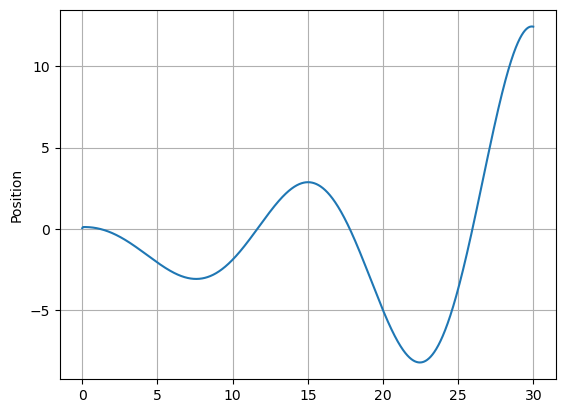

In [16]:
from vpython import *
import numpy as np
import matplotlib.pyplot as pyplt
#ADDED
import random

scene = canvas()

pend = cylinder(pos=vec(0,0,0), axis=vec(0,1,0), radius=0.04, length=1, color=vec(1,0,0))
pend.mass = 1
pend.theta = np.pi/2-0.1
pend.thetaDot = 0

rail = cylinder(pos=vec(0, 0, 0), axis=vec(1,0,0), radius=0.1, length=30, color=vec(0,1,0))
rail.pos.x=-rail.length/2
rail.pos.y=-rail.radius

#positionOutput = wtext(text='Position={:f}'.format(0))
def endSim():
    # global t
    # t=endTime
    global targetPos
    targetPos *= -1
endButton = button(text="End Sim", bind=endSim)

G = 9.8
damping = 0.02
coefficientOfRestitution = 0.8
collisions = False

kP_stable = 40
kP_move = 0.5
# kP_stable = 0
# kP_move = 0
kD_move=0
prevPositionError = 0
targetPos = -1

t = 0
endTime = 30
dt = 0.01
speedMultiplier = 1

#ADDED - Lists for data storage
time_data = []
position_data = []
#velocity_data = []

#ADDED - Values for false data injection
active_injection_attack = False
injection_rate = .1
attack_severity = .2
targeted_data = "position" #"position" or "velocity"


def getControlSignal(pend, xPos):
    global prevPositionError
    positionError = pend.pos.x-xPos
    if abs(np.pi/2 - pend.theta) < np.pi/4:
        signal = (np.pi/2-pend.theta)*kP_stable + positionError*kP_move + (positionError-prevPositionError)*kD_move
    else:
        signal = 0
    prevPositionError = positionError
    return signal

def updatePend(pend, dt):
    #ADDED - Check if attack enabled
    if active_injection_attack:
        inject_false_data(pend)
    
    xDot = getControlSignal(pend, targetPos)
    pend.pos.x += xDot*dt
    pend.theta += np.atan(xDot*dt/pend.length)
    pend.theta %= np.pi*2
    
    torque = -G*pend.mass*pend.length/2*np.cos(pend.theta) - pend.thetaDot*damping
    moment = 0.333*pend.mass*pend.length**2
    thetaDoubleDot = torque/moment
    pend.thetaDot += thetaDoubleDot*dt
    pend.theta += pend.thetaDot*dt
    
    if pend.theta < 0 or pend.theta > np.pi and collisions:
        pend.theta = 0 if pend.theta < 0 else np.pi
        pend.thetaDot *= -1*coefficientOfRestitution
    
    pend.axis = rotate(vec(1, 0, 0), pend.theta, vec(0, 0, 1))*pend.length
    positionOutput.text = 'Position={:f}'.format(pend.pos.x)
    return pend


def inject_false_data(pend):
    if random.random() <= injection_rate:
        if targeted_data == "position":
            shift = random.uniform(-attack_severity, attack_severity)
            pend.pos.x += shift
        elif targeted_data == "velocity":
            shift = random.uniform(-attack_severity, attack_severity)
            pend.theta += shift

while t < endTime:
    pend = updatePend(pend, dt*speedMultiplier)
    
    #ADDED - simullation data storing
    time_data.append(t)
    position_data.append(pend.pos.x)
    #velocity_data.append() Do we want?
    
    t += dt
    
    #ADDDED - simulation timing
    scene.caption = f"Simulation time: {t:.2f}/{endTime:.2f}\nPosition: {pend.pos.x:.2f}"

    rate(1/dt)
    
#ADDED - Plotting data
pyplt.plot(time_data, position_data)
pyplt.ylabel('Position')
pyplt.grid()
pyplt.show()

In [ ]:
active_injection_attack = True
injection_rate = .1
attack_severity = .2
